![Titanic](https://urbanian.mundodeportivo.com/p/943f/11817_este_video_de_3_horas_muestra_en_tiempo_real_el_hundimiento_del_titanic__thumb_fb.jpg?cb=8859627)

# Titanic - Aprendizado de Máquina com Desastre

O famosa desafio do Titanic do Kaggle, nós propoêm criação de um model de algoritmo de machine learning para prever com alta taxa de acerto, quais passageiros sobreviverão ao naufrágio do Titanic.

### História do Titanic:

O RMS Titanic foi um dos navios mais famosos e luxuosos já construídos na época. Ele foi projetado como um navio de passageiros de classe mundial e foi construído no início do século 20. O Titanic foi operado pela White Star Line e era aclamado como "inafundável" devido ao seu design inovador e tecnologia de segurança.

Em sua viagem inaugural, o Titanic partiu de Southampton, Inglaterra, em 10 de abril de 1912, com destino a Nova York. No entanto, em 14 de abril de 1912, o navio colidiu com um iceberg no Atlântico Norte, a cerca de 600 km ao sul da Terra Nova. A colisão danificou seriamente o casco do navio, resultando em seu naufrágio.

O naufrágio do Titanic é um dos desastres mais conhecidos da história. Devido à falta de botes salva-vidas suficientes e à má preparação para uma evacuação de emergência, mais de 1.500 pessoas perderam a vida. O navio afundou na madrugada de 15 de abril de 1912, e apenas cerca de 700 sobreviventes foram resgatados por navios que vieram em seu socorro.

### Sobre os dados:

Nesta competição, teremos acesso a dois conjuntos de dados semelhantes que incluem informações sobre os passageiros, como nome, idade, sexo, classe socioeconômica etc. Um conjunto de dados é intitulado train.csv e o outro é intitulado test.csv.

O train.csv conterá os detalhes de um subconjunto dos passageiros a bordo (891, para ser exato) e, o que é mais importante, revelará se eles sobreviveram ou não, também conhecido como "verdade básica".

O conjunto de dados test.csv contém informações semelhantes, mas não revela a "verdade básica" de cada passageiro. Sua tarefa é prever esses resultados.

### Objetivo: 

Usando os padrões encontrados nos dados train.csv, devemos prever se os outros 418 passageiros a bordo (encontrados em test.csv) sobreviveram.


Fonte desafio: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)

In [1]:
# Para engenharia de recursos com expressões regulares.
import re

# Para leitura, manipulação e análise dos dados.
import numpy as np
import pandas as pd

# Para visualização e análise dos dados.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo

# Para padronização dos dados.
from sklearn.preprocessing import StandardScaler

# Para o treinando dos modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Para análise dos modelo
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit, cross_val_score

# Coleta dos Dados

#### **Sobre os dados:**

**PassengerId**: Um identificador único para cada passageiro.

**Survived**: Indica se o passageiro sobreviveu (1) ou não (0) ao naufrágio. Esta é geralmente a variável alvo que deseja-se prever.

**Pclass (Classe):** A classe da passagem do passageiro (1ª, 2ª ou 3ª classe).

**Name**: O nome do passageiro.

**Sex**: O sexo do passageiro.

**Age**: A idade do passageiro.

**SibSp**: Número de irmãos/cônjuges a bordo.

**Parch**: Número de pais/filhos a bordo.

**Ticket**: O número do bilhete.

**Fare**: A tarifa paga pelo passageiro.

**Cabin**: O número da cabine do passageiro.

**Embarked**: O porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton).

In [2]:
# Carregandos os dados.
dftest = pd.read_csv('/kaggle/input/titanic/test.csv')
dftrain = pd.read_csv('/kaggle/input/titanic/train.csv')
dfgendersubmission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# **Limpeza e Preparação do Dados**

## Primeiras Imprensões

In [3]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
dfgendersubmission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
print("Número total de linhas nos dados de treinamento ", dftrain.shape[0])
print("Número total de colunas nos dados de treinamento ", dftrain.shape[1])
print("Número total de linhas nos dados de teste ", dftest.shape[0])
print("Número total de colunas nos dados de teste ", dftest.shape[1])

Número total de linhas nos dados de treinamento  891
Número total de colunas nos dados de treinamento  12
Número total de linhas nos dados de teste  418
Número total de colunas nos dados de teste  11


In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# **Trantandos valores nulos:**

#### Dados de teste:

In [9]:
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
dftest['Cabin'].fillna('Missing', inplace=True)

dftest['Fare'].fillna(dftest['Fare'].mean(), inplace = True)

dftest['Age'].fillna(dftest['Age'].mean(), inplace=True)

dftest.rename(columns={'Parch': 'ParCh'}, inplace=True)

In [11]:
dftest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
ParCh          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Dados de treinamento:

In [12]:
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
dftrain['Age'].fillna(dftrain['Age'].mean(), inplace=True)

dftrain['Cabin'].fillna('missing', inplace=True)

dftrain['Embarked'].fillna('S', inplace=True)

dftrain.rename(columns={'Parch': 'ParCh'}, inplace=True)

dftrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
ParCh          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Análise Descritiva e Visualização

A análise descritiva e a visualização de dados são passos vitais na exploração e compreensão de conjuntos de dados. A análise descritiva oferece estatísticas como média e mediana, ajudando a entender como os dados estão distribuídos. A visualização de dados, por meio de gráficos e gráficos, ajuda a encontrar tendências, relações e padrões nos dados e a comunicar resultados de maneira eficaz. Essas etapas iniciais são fundamentais para formular hipóteses, planejar a modelagem e tomar decisões informadas em projetos de ciência de dados e aprendizado de máquina.

In [14]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,ParCh,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
import plotly.graph_objs as go

hist = go.Histogram(x=dftrain['Age'], name='Age')

layout = go.Layout(
    title="Age Frequency in the Set",
    xaxis=dict(title="Values"),
    yaxis=dict(title="Frequency"),
)

fig = go.Figure(data=[hist], layout=layout)

pyo.iplot(fig)

In [16]:
hist = go.Histogram(x=dftrain['Fare'], name='Fare')

layout = go.Layout(
    title="Fare Frequency in the Set",
    xaxis=dict(title="Values"),
    yaxis=dict(title="Frequency"),
)

fig = go.Figure(data=[hist], layout=layout)

pyo.iplot(fig)

In [17]:
hist = go.Histogram(x=dftrain['Pclass'], name='Pclass')

layout = go.Layout(
    title="Pclass Frequency in the Set",
    xaxis=dict(title="Values"),
    yaxis=dict(title="Frequency"),
)

fig = go.Figure(data=[hist], layout=layout)

pyo.iplot(fig)

In [18]:
hist = go.Histogram(x=dftrain['SibSp'], name='SibSp')

layout = go.Layout(
    title="SibSp Frequency in the Set",
    xaxis=dict(title="Values"),
    yaxis=dict(title="Frequency"),
)

fig = go.Figure(data=[hist], layout=layout)

pyo.iplot(fig)

In [19]:
hist = go.Histogram(x=dftrain['ParCh'], name='ParCh')

layout = go.Layout(
    title="ParChFrequency in the Set",
    xaxis=dict(title="Values"),
    yaxis=dict(title="Frequency"),
)

fig = go.Figure(data=[hist], layout=layout)

pyo.iplot(fig)

In [20]:
tree_map = px.treemap(dftrain, path=["Age", "Pclass", 'Sex'], color='Sex', 
                      color_discrete_map={'male': 'blue', 'female': 'pink'},
                      labels={'Age': 'Age', 'Pclass': 'Classe', 'Sex': 'Gender'}
                    )

tree_map.update_layout(title='Age, Class and Gender Distribution Treemap')

tree_map.update_traces(textinfo="label+value", 
                       textfont=dict(size=12, family="Arial"))

tree_map.update_layout(margin=dict(l=10, r=10, t=60, b=10))

tree_map.show()

In [21]:
fig = px.parallel_categories(dftrain, dimensions=["Pclass", "Sex"], labels={"Pclass": "Passenger Class", "Sex": "Sex"})
fig.update_traces(line=dict(color="purple")) 
fig.update_layout(
    title="Relation between Passenger Class and Sex",
    showlegend=True
)

fig.show()

In [22]:
values_count_sex = dftrain["Sex"].value_counts()

graph = px.bar(values_count_sex, values_count_sex.index,\
               values_count_sex.values, labels={"x":"Sex", "y":"Counts"})
graph.update_layout(title="Count by Sex")
graph.show();

In [23]:
values_count = dftrain["Pclass"].value_counts()

graph = px.bar(values_count, values_count.index,\
               values_count.values, labels={"x":"Class", "y":"Counts"})
graph.update_layout(title="Count by Class")
graph.show();

In [24]:
values_count = dftrain["Embarked"].value_counts()

graph = px.bar(values_count, values_count.index,\
               values_count.values, labels={"x":"Embarked", "y":"Counts"})
graph.update_layout(title="Count by Embarked")
graph.show();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



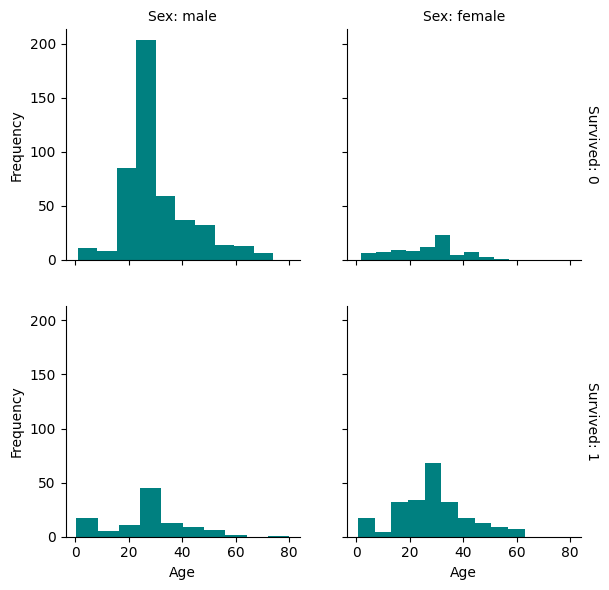

In [25]:
g = sns.FacetGrid(dftrain, col="Sex", row="Survived", margin_titles=True)

g.map(plt.hist, "Age", color="Teal")

g.set_axis_labels("Age", "Frequency")
g.set_titles(col_template="Sex: {col_name}", row_template="Survived: {row_name}")


g.fig.subplots_adjust(wspace=0.2, hspace=0.2)


plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



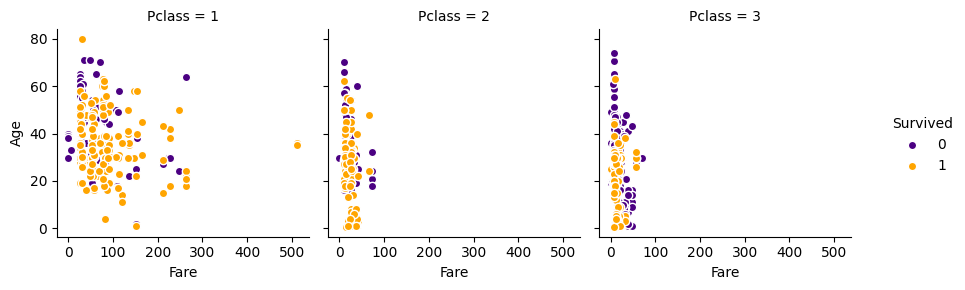

In [26]:
g = sns.FacetGrid(dftrain, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"Orange", 0:"Indigo"}
)
                  
g=g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



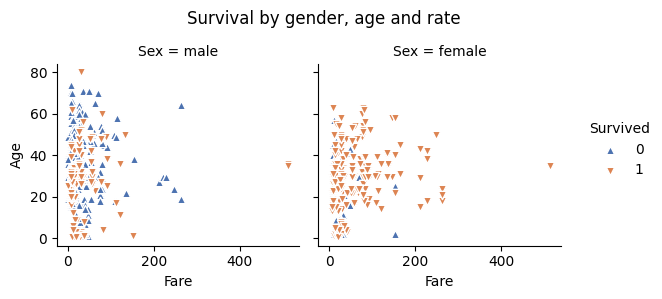

In [27]:
g = sns.FacetGrid(dftrain, hue="Survived", col="Sex", margin_titles=True,
                palette="deep", hue_kws=dict(marker=["^", "v"])
)

g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend()

plt.subplots_adjust(top=0.8)

g.fig.suptitle('Survival by gender, age and rate');

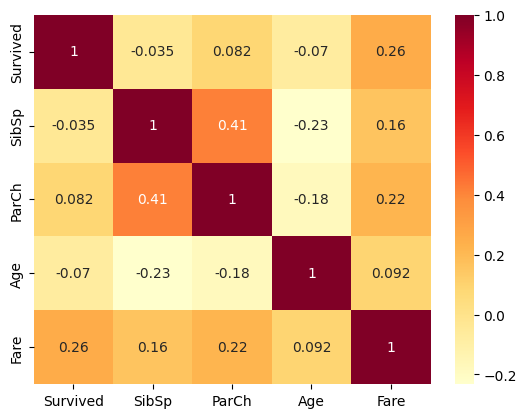

In [28]:
g = sns.heatmap(dftrain[["Survived","SibSp","ParCh","Age","Fare"]].corr(),annot=True, cmap = "YlOrRd")

# Engenharia de Recursos

Será aplicado um dos métodos de engenharia de recursos que envolve a criação de novos recursos a partir do que temos à disposição. Vale ressaltar que este é um processo fundamental para análise de dados e para o desenvolvimento de modelos de machine learning. Assim, podemos realizar uma análise mais robusta e nossos modelos serão treinados com mais dados, o que é excelente.

#### **Dados de treinamentos:**

In [29]:
dftrain['Number_Family'] = dftrain['SibSp'] + dftrain['ParCh']

dftrain['IsAlone'] = (dftrain['Number_Family'] == 0).astype(int)

dftrain['AgeCategory'] = pd.cut(dftrain['Age'], bins=[0, 12, 18, 30, 60, 100], labels=['Child', 'Adolescent', 'Youth', 'Adult', 'Elderly'])

dftrain['FareClassification'] = pd.qcut(dftrain['Fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

dftrain['AgeXClass'] = dftrain['Age'] * dftrain['Pclass']

dftrain['Title'] = dftrain['Name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(1))

dftrain['Title'] = dftrain['Title'].replace(['Mlle', 'Mme', 'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')


#### **Dados de Teste:**

In [30]:
dftest['Number_Family'] = dftest['SibSp'] + dftest['ParCh']

dftest['IsAlone'] = (dftest['Number_Family'] == 0).astype(int)

dftest['AgeCategory'] = pd.cut(dftest['Age'], bins=[0, 12, 18, 30, 60, 100], labels=['Child', 'Adolescent', 'Youth', 'Adult', 'Elderly'])

dftest['FareClassification'] = pd.qcut(dftest['Fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

dftest['AgeXClass'] = dftest['Age'] * dftest['Pclass']

dftest['Title'] = dftest['Name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(1))

dftest['Title'] = dftest['Title'].replace(['Mlle', 'Mme', 'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

# Visualização dos Dados - Parte 2

In [31]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Number_Family,IsAlone,AgeCategory,FareClassification,AgeXClass,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,1,0,Youth,Low,66.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Adult,High,38.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,0,1,Youth,Medium-Low,78.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Adult,High,35.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,0,1,Adult,Medium-Low,105.0,Mr


In [32]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,ParCh,Fare,Number_Family,IsAlone,AgeXClass
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694,64.966817
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,0.489615,32.947541
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.920000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,40.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,63.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,89.097353
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,222.000000


In [33]:
dftrain.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                               

<Axes: xlabel='Survived', ylabel='Number_Family'>

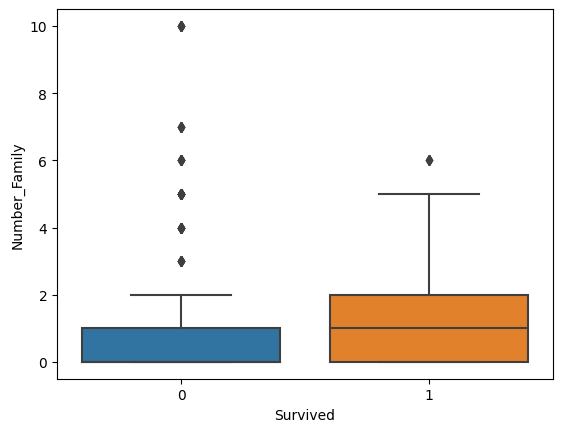

In [34]:
sns.boxplot(data=dftrain, x= "Survived", y= "Number_Family")

# Tratamento de Dados Não Numéricos

Embora os modelos possam ser treinados com dados não numéricos, é importante ressaltar que, para obter maior precisão nas inferências feitas pelos modelos, é crucial que os dados sejam numéricos, visto que os algoritmos dos modelos processam os dados através de diversos cálculos matemáticos.

#### Convertendo para Dados Númericos:

In [35]:
344243dftrain['Title'] = dftrain['Title'].replace('Master', 1).replace('Miss', 2).replace('Mr', 3).replace('Mrs', 4).replace('Ms', 5).replace('Others', 6).astype(int)
dftest['Title'] = dftest['Title'].replace('Master', 1).replace('Miss', 2).replace('Mr', 3).replace('Mrs', 4).replace('Ms', 5).replace('Others', 6).astype(int)

SyntaxError: invalid decimal literal (1089691802.py, line 1)

In [ ]:
dftrain['Sex'] = dftrain['Sex'].replace(['male', 'female'], [0, 1]).astype(int)
dftest['Sex'] = dftest['Sex'].replace(['male', 'female'], [0, 1]).astype(int)

In [ ]:
dftrain['Embarked'] = dftrain['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2]).astype(int)
dftest['Embarked'] = dftest['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2]).astype(int)

#### Aplicando o One-Hot nos Dados de Teste e Treinamento:

In [ ]:
dftrain = pd.get_dummies(dftrain, columns=['AgeCategory', 'FareClassification'], dtype=int)
dftest = pd.get_dummies(dftest, columns=['AgeCategory', 'FareClassification'], dtype=int)

#### Deletandos as colunas que não serão relevantes para classificação:

In [ ]:
del dftrain['PassengerId']
del dftrain['Name']
del dftrain['Ticket']
del dftrain['Cabin']

del dftest['PassengerId']
del dftest['Name']
del dftest['Ticket']
del dftest['Cabin']

In [ ]:
dftrain.shape

# Divisão entre Classificadores e Previsores

Agora é o momento de dividir nossa base de dados entre classificadores e previsores. Os previsores são os dados que serão usados para treinar o modelo, e os classificadores são os rótulos que queremos prever com base nesses dados. Essa divisão é fundamental para o processo de treinamento e avaliação de modelos de machine learning. Com os previsores e classificadores claramente definidos, podemos prosseguir com a construção e ajuste dos modelos para atingir os objetivos do projeto.

#### **Definindo as variáveis previsores:**

In [ ]:
xPredictors = dftrain.drop(["Survived"], axis=1)
x_train = xPredictors.values

#### **Definindo a variável de classificação:**

In [ ]:
y_train = dftrain.iloc[:, 0].values

# Escalonamento de Valores

O escalonamento de valores é uma etapa crítica no pré-processamento de dados para muitos algoritmos de machine learning. Essa técnica visa normalizar ou padronizar os valores das variáveis para que estejam em uma faixa comparável. Isso é importante porque muitos algoritmos são sensíveis à escala dos dados, e valores em escalas diferentes podem afetar negativamente o desempenho do modelo.

Para este nosso desafio, será aplicado a técnica da normalização que dimensiona os dados para um intervalo fixo, geralmente de 0 a 1, tornando os dados comparáveis e mantendo as relações de ordem entre os valores originais.

In [ ]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()


x_train_std = scaler_train.fit_transform(x_train)
x_test_std = scaler_test.fit_transform(dftest)

# **Salvandos o dados:**

Os dados estão pronto e podem ser salvos se necessário.

In [ ]:
import pickle

with open('x_train_std.pkl', mode = 'wb') as file:
    pickle.dump([x_train_std, y_train], file)

# Aplicação de Modelos

Os modelos que serão utilizados para prever quais serão os sobreviventes são modelos de classificação de machine learning amplamente conhecidos e utilizados em tarefas de classificação e previsão, nas quais as inferências resultantes devem ser precisas e confiáveis. O objetivo é treinar esses modelos com os dados que foram preparados até o momento, testá-los com os dados de teste que também foram preparados e, por fim, classificar os sobreviventes com base nas previsões de cada modelo, determinando o melhor modelo para esta tarefa.

Segue a lista dos modelos que serão implementados:

1. Gaussian Naive Bayes
2. Decision Tree
3. Random Forest
4. k-Nearest Neighbors
5. Logistic Regression
6. Support Vector Classifier
7. Multi-Layer Perceptron Classifier

**Atenção**: 

Uma vez que não temos acesso às classificações reais dos sobreviventes no conjunto de dados de teste para comparar as previsões dos modelos, usaremos a acurácia como métrica de desempenho de cada modelo durante o treinamento, além da média do desempenho do modelo em 10 dobras de validação cruzada.


### **Gaussian Naive Bayes**

In [ ]:
gaussian_titanic = GaussianNB()

gaussian_titanic.fit(x_train_std, y_train)

naive_predictions = gaussian_titanic.predict(x_test_std)

accuracy_gaussian = round(gaussian_titanic.score(x_train_std, y_train) * 100, 2)
score_gaussian = cross_val_score(gaussian_titanic, x_train_std, y_train, cv=10).mean()

print('------------------- Gaussian Naive Bayes -------------------')
print()
print('Model Accuracy: ', accuracy_gaussian)
print('Cross validation mean:', score_gaussian)

### **Decision Tree**

In [ ]:
dicisiontree_titanic = DecisionTreeClassifier(criterion='entropy', random_state=0)
dicisiontree_titanic.fit(x_train_std, y_train)

predictions_dicisiontree = dicisiontree_titanic.predict(x_test_std)

accuracy_decisiontree = round(dicisiontree_titanic.score(x_train_std, y_train) * 100, 2)
score_decisiontree = cross_val_score(dicisiontree_titanic, x_train_std, y_train, cv=10).mean()

print('------------------- Decision Tree Classifier -------------------')
print()
print('Model Accuracy: ', accuracy_decisiontree)
print('Cross validation mean:', score_decisiontree)

### **Random Forest Classifier**

In [ ]:
randomforest_titanic  = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)

randomforest_titanic.fit(x_train_std, y_train)

predictions_randomforest = randomforest_titanic.predict(x_test_std)

accuracy_randomforest = round(randomforest_titanic.score(x_train_std, y_train) * 100, 2)
score_randomforest = cross_val_score(randomforest_titanic, x_train_std, y_train, cv=10).mean()

print('------------------- Random Forest Classifier -------------------')
print()
print('Model Accuracy: ', accuracy_randomforest)
print('Cross validation mean:', score_randomforest)

### **k-Nearest Neighbors Classifier**

In [ ]:
knn_titanic = KNeighborsClassifier(n_neighbors=1)
knn_titanic.fit(x_train_std, y_train)

prediction_knn = knn_titanic.predict(x_test_std)

accuracy_knn = round(knn_titanic.score(x_train_std, y_train) * 100, 2)
score_knn = cross_val_score(knn_titanic, x_train_std, y_train, cv=15).mean()

print('------------------- k-Nearest Neighbors -------------------')
print()
print('Model Accuracy: ', accuracy_knn)
print('Cross validation mean:', score_knn)

### **Logistic Regression**

In [ ]:
lregression = LogisticRegression(random_state=0,  C=5)
lregression.fit(x_train_std, y_train)

predictions_lregression =  lregression.predict(x_test_std)

accuracy_lregression = round(lregression.score(x_train_std, y_train) * 100, 2)
score_lregression = cross_val_score(lregression, x_train_std, y_train, cv=5).mean()

print('------------------- Logistic Regression -------------------')

print()
print('Model Accuracy: ', accuracy_lregression)
print('Cross validation mean:', score_lregression)

### **Support Vector Classification**

In [ ]:
SVC_titanic = SVC(kernel='linear', random_state=1, C=1.0)
SVC_titanic.fit(x_train_std, y_train)

predictions_SVC = SVC_titanic.predict(x_test_std)

accuracy_SVC = round(SVC_titanic.score(x_train_std, y_train) * 100, 2)
score_SVC = cross_val_score(SVC_titanic, x_train_std, y_train, cv=5).mean()

print('------------------- Support Vector Classification -------------------')

print()
print('Model Accuracy: ', accuracy_SVC)
print('Cross validation mean:', score_SVC)

### **Multi Layer Perceptron Classifier - Artificial Neural Networks**

In [ ]:
MLPC_titanic = MLPClassifier(max_iter=5000, verbose=0, tol=0.0000100,
                                   solver = 'adam', activation = 'identity',
                                   hidden_layer_sizes = (60,60))

MLPC_titanic.fit(x_train, y_train);

accuracy_MLPC = round(MLPC_titanic.score(x_train_std, y_train) * 100, 2)
score_MLPC = cross_val_score(MLPC_titanic, x_train_std, y_train, cv=15).mean()

print('------------------- Multi Layer Perceptron Classifier -------------------')
print()
print('Model Accuracy: ', accuracy_MLPC)
print('Cross validation mean:', score_MLPC)

# Curva de Aprendizado

Também será utilizado o gráfico de curva de aprendizado para análise do desempenho do modelo à medida que mais dados de treinamento são usados. Nesse gráfico, será medida a relação entre o tamanho do conjunto de treinamento e o desempenho do modelo, que é medido pela acurácia. Além disso, poderemos identificar se o modelo está sofrendo de overfitting ou underfitting.

### Gaussian Naive Bayes e Decision Tree

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_train_std,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([gaussian_titanic, dicisiontree_titanic]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

### Random Forest e k-Nearest Neighbors

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

common_params = {
    "X": x_train_std,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

estimators = [randomforest_titanic, knn_titanic]

for ax_idx, estimator in enumerate(estimators):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")


### Logistic Regression e Suport Vector Classifier

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_train_std,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([lregression, SVC_titanic]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

### Gaussian Naive Bayes e Multi Layer Perceptron

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x_train_std,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([gaussian_titanic, MLPC_titanic]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

# Resultado dos modelos

**Gaussian Naive Bayes:** Accuracy 77.33

**Decision Tree:** Accuracy 98.43

**Random Forest Classifier:** Accuracy 98.43

**k-Nearest Neighbors Classifier:** Accuracy 97.87

**Logistic Regression:** Accuracy 81.82

**Support Vector Classification:** Accuracy 81.59

**Multi Layer Perceptron Classifier:** Accuracy 79.12


# Conclusão:

Com base nos resultados apresentados, podemos tirar as seguintes conclusões:

Os modelos "Decision Tree" e "Random Forest Classifier" demonstraram um desempenho excepcional, alcançando as maiores acurácias. Isso sugere que esses modelos são altamente eficazes na tarefa de classificação e podem ser opções viáveis para prever os sobreviventes.

O modelo "k-Nearest Neighbors Classifier" também obteve uma acurácia bastante alta, indicando sua capacidade de classificação precisa.

Embora o "Gaussian Naive Bayes" e o "Multi Layer Perceptron Classifier" tenham acurácias um pouco mais baixas, eles ainda mostram um desempenho aceitável e podem ser considerados como opções alternativas.

Os modelos "Logistic Regression" e "Support Vector Classification" apresentaram as acurácias mais baixas entre os modelos testados. Isso pode sugerir que esses modelos não se ajustaram tão bem aos dados ou que a escolha das características pode precisar ser revisitada.